![banner](../src/visuals/banner.png)

# Intro to PyTorch (Technically A Numpy Replacement)

The functionality of PyTorch is very similar to Numpy with two exceptions:
- Ability to move tensors onto a GPU

- Automatic differentiation engine that powers Neural Networks

We will first be studying the functionalty of PyTorch and how we can use it to manipulate tensors as we do in Numpy

## Prerequisites for this notebook
- Python Programming
    - Classes (just the basics)
    - Numpy
    - For Loops
 
## What do you need for Deep Learning?
- **Must Know**
    - Linear Algebra
    - Calculus
    - Probability and Statistics
    - Optimization


- **Nice to Know**
    - Toplogy
    - Graph Theory 
    - Partial Differential Equations
    - Any knowledge you can get your hands on!
        - Diffusion Models leverage concepts from Thermodynamics


## What is a Tensor?

Generally we arrange data into rows and columns, such as a CSV file or a grid that represents an image. These can be thought of as 2 dimensions, where data is represented along two axis.

A lot of real world datasets though cannot be represented as such and require a higher number of dimensions. For example, and we will be studying this a lot later, lets think about color images. 

### Color Image
To humans, we see colors as red, green, blue, etc... but this is not the case for computers. A computer has to represent an image as an array of numbers (pixel values). Black and white images are relatively simple, and can be represented with a single channel (a single height x width array).

When we go to color images though, you may have heared of RGB, where the colors we see are a mixture of Red, Green, and Blue color levels. In this case we have 3 channels, a single height x width array for each channel, therefore giving us a dimension of (3 x height x width). Now that we have a 3d matrix, we call this a tensor

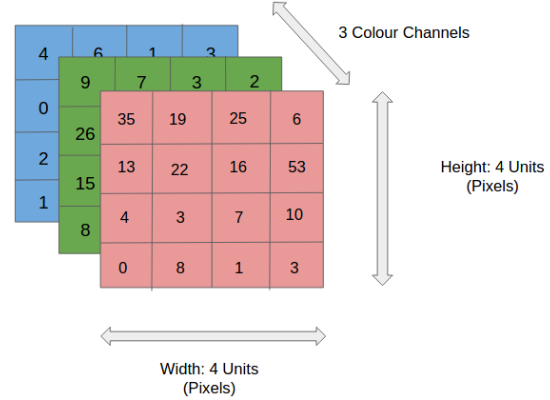

credit: https://towardsdatascience.com/convolution-neural-network-for-image-processing-using-keras-dc3429056306


### Creating Tensors
Let's try to create some tensors from data we input




In [1]:
### IMPORTS ###
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import time
import matplotlib.pyplot as plt


In [2]:
data = [1.0, 2.0, 3.0]
tensor = torch.Tensor(data)
print("Example with 1-D data")
print(tensor)

# Example with 2-D data
data = [[1., 2., 3.], [4., 5., 6]]
tensor = torch.Tensor(data)
print("\nExample with 2-D data")
print(tensor)

Example with 1-D data
tensor([1., 2., 3.])

Example with 2-D data
tensor([[1., 2., 3.],
        [4., 5., 6.]])


# Generate Random Tensors

In [3]:
rand = torch.randn(2,3,3)
rand

tensor([[[ 0.4138, -1.0997,  0.2333],
         [-0.3930, -0.1716, -0.1215],
         [ 0.6964, -0.7657,  0.4142]],

        [[ 0.9399, -0.3334,  0.4474],
         [ 1.0313,  0.5323, -0.4429],
         [-0.2705, -0.0143, -2.4689]]])

## AutoGrad: The Power of PyTorch
Everything we have seen so far can be replicated in Numpy in the same fashion.What makes PyTorch unique is that when doing calculations on a tensor, it will keep track of what was done to then calculate derivatives. The reason its important to keep track of this is to make Backpropagation as efficient as possible. 

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it **starts to track all operations on it**. When
you finish your computation you can call ``.backward()`` and have **all the
gradients computed automatically**. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To **stop a tensor from tracking history**, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To **prevent tracking history (and using memory)**, you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with `requires_grad=True`,
but for which we don't need the gradients.

Let us consider a complete example now where x = 1

$$f(x) = 3*(x + 2)^2$$


We can then calculate the derivative (with respect to x)

$$f'(x) = 6*(x + 2)$$

$$f'(1) = 6*(1 + 2) = 18$$

In [4]:
x = torch.ones(2,2, requires_grad=True)
y = x + 2
z = y**2 * 3
z = z.mean()

z.backward()
print("Averagae Gradient")
print(x.grad.sum())

Averagae Gradient
tensor(18.)


## Linear Regression? Why Bother?

![image](https://miro.medium.com/max/1400/1*Nf2tTTkALYq6RTMQmhjo1A.png)

creidt: https://pub.towardsai.net/linear-regression-basics-for-absolute-beginners-68ed9ff980ae

We will start with a super simple linear regression problem to demo how deep learning and pytorch works. In this example we will have one input variable and one output variable, so our formula will look like this! (You should recognize this from before)

$$ y = w_0 + w_1*x_1$$

### Optimizing What Exactly?
$$\frac{1}{N}\sum_{i=1}^{n}(y - \hat{y})^2$$


### Linear Regression has a Closed Form Solution
$$W = \begin{bmatrix} w_0 \\ w_1 \\  \vdots \end{bmatrix} = (X^TX)^{-1}X^Ty$$



### Lets Double Check Scikit Learn



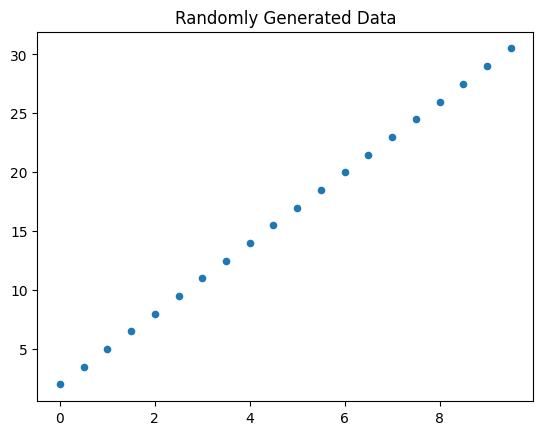

In [5]:
X = np.arange(0, 10, 0.5)
epsilon = np.random.normal(0, 0.5, len(X))
y = (2 + 3*X)

plt.scatter(X, y, s=20)
plt.title("Randomly Generated Data")
plt.show()

In [6]:
X, y = X.reshape(-1,1), y.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)
print("W_1:", model.coef_[0][0])
print("W_0:", model.intercept_[0])

W_1: 3.0000000000000004
W_0: 1.9999999999999982


## How about Pytorch?

The Pytorch Model Class has two main things you need to implement:
```
__init__: All your functions are initialized here

super().__init__(): You need to initialize the inherited Class

forward: How will you pass your data through?
```

### What is Gradient Descent?
![image](https://sebastianraschka.com/images/faq/gradient-optimization/ball.png)
credit: https://sebastianraschka.com/faq/docs/gradient-optimization.html

In [7]:
torch.seed()

class SGDRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
    
    def forward(self, x):
        y = self.fc1(x)
        return y

model = SGDRegression()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
EPOCHS = 5000

X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

In [8]:
# Take a look at current parameters
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[-0.4732]], requires_grad=True)
fc1.bias Parameter containing:
tensor([-0.5567], requires_grad=True)


In [9]:
losses = []
for epoch in range(EPOCHS):
    ### PASS DATA THROUGH MODEL ###
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())
    
    ### OPTIMIZE MODEL ###
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print Gradient
#     print(loss)
#     print(model.fc1.weight.grad)


In [10]:
# What is our weight and bias now?
for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[3.0000]], requires_grad=True)
fc1.bias Parameter containing:
tensor([2.0000], requires_grad=True)


## What about Classification?

Deep Learning is also a powerful classification tool, but we will look at the simplest version!

### Logistic Regression
Lets pretend we have two classes, A and B, and given some data we want to predict which class the sample belongs to. We can see that where in regression we wanted to predict some specific value as the output, we will now predict the probability of the data belonging to A or B. The class with the highest probability will be chosen as the selected class. 

Before we get into it more, lets first generate some data to work with! We will make two blobs of data and draw the best line we can to seperate the two classes.

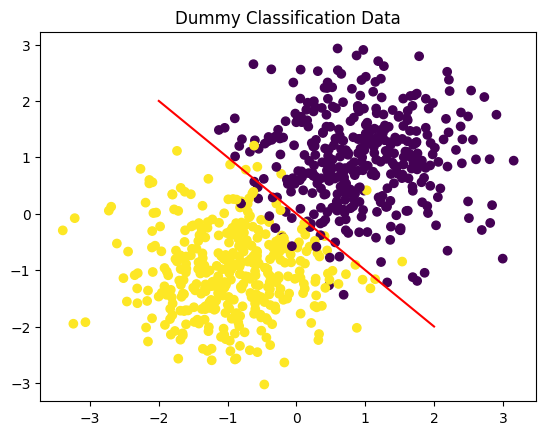

In [11]:
### Generate Blob Data ###
centers = [[1, 1], [-1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.8,
                            random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=labels_true)
plt.title("Dummy Classification Data")
plt.plot([-2,2], [2,-2], "r")
plt.show()

### Why not use Linear Regression for Classification?

Lets try to fit a regression model to our data and see what the results look like!

W_1: 0.6146390237469734
W_0: -0.013173771563142655


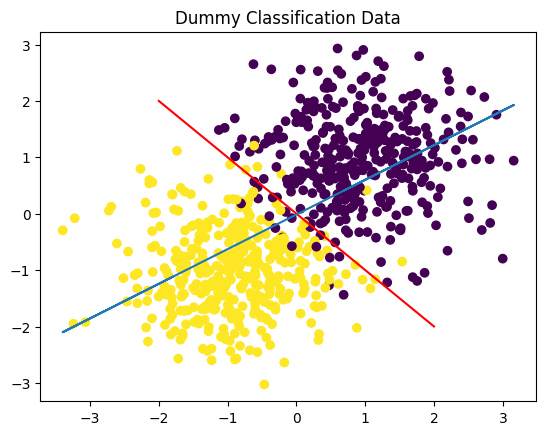

In [12]:
X, y = X[:,0].reshape(-1,1), X[:,1].reshape(-1,1)

model = LinearRegression()
model.fit(X, y)
print("W_1:", model.coef_[0][0])
print("W_0:", model.intercept_[0])

plt.scatter(X, y, c=labels_true)
plt.title("Dummy Classification Data")
plt.plot([-2,2], [2,-2], "r")
plt.plot(X,model.predict(X))
plt.show()

Clearly this is not what we wanted. We want the red line that can best seperate the two classes rather than the blue line that just regresses on them. Therefore lets dive into the Logistic Regression Formulation! The general ideas for logistic regression will hold true for most classification tasks we will face in the future. 

### The Sigmoid Function

$$Sigmoid(x) = \frac{1}{1 + e^{-x}}$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png)

credit: Wikipedia

The sigmoid function is crucial to our problem of interest. Remember, our goal is not to predict some specific value, but rather, the probability that a sample belongs to different classes. An important consideration is that probability can only range between 0 and 1. Therefore, the Sigmoid function will return Y=0 for very negative X values and Y=1 for very positive X values. Also for simplicity, lets stick to just Binary Logistic regression for now,

Although we wont be doing the calculations here, we can derive the loss function for Logistic Regression by taking the derivative of our Sigmoid and then the partial derivatives of that expression with respect to all the parameters in our Logistic function. This will give you the following results:


$$\text{Binary Cross Entropy} = -\frac{1}{N}\sum_{i=1}^N y_ilog(p(y_i)) + (1-y_i)log(p(1-y_i))$$

Lets quickly decode whats happening above
- If our true value for $y_i$ is 1, then our Loss = $y_ilog(p(y_i))$ as the second term will be 0
- If our true value for $y_i$ is 0, then our Loss = $(1-y_i)log(p(1-y_i))$ as the first term will be 0


The overall idea is that if we have Class A and B, and an object belongs to class A, then the expected probabiliteis are 1 for A and 0 for B. Our model may then predict 0.8 for A and 0.2 for B which means there is some error as it is not a perfect A=1/B=0. The Binary Cross Entropy loss essentially compares these two distributions and penalizes any deviations away from our wanted distribution. This generalized into Categorical Cross Entropy for multiclass prediction which we will need later!

Lets then implement our Logistic regression in PyTorch to see if we can get better accuracy! Notice its almost identical to our Linear Regression Implementation but we are now using an additional Sigmoid on our output of the fully connected layer before returning Y. Also, because we are returning a single ouput, 0.5 is our threshold where any value greater than 0.5 would be classified as 1 and anything lower would be classified as 0.

In [13]:
torch.seed()

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
    
    def forward(self, x):
        y = torch.sigmoid(self.fc1(x))
        return y

model = LogisticRegression()
loss_fn = torch.nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
EPOCHS = 5000

X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

In [14]:
losses = []
for epoch in range(EPOCHS):
    ### PASS DATA THROUGH MODEL ###
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())
    
    ### OPTIMIZE MODEL ###
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
accuracy = np.sum(np.array((y_pred<0.5)).astype(int).squeeze() == labels_true) / len(y_pred)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.776


## Dense MNIST Deep Learning Model
Mnist is a common starting dataset as is relatively simple to predict. This dataset is handwritten digits from 0-9 and our goal is to predict the digit given an image. Lets start by loading our needed packages and seeing some examples of these digits. 

Below are **PyTorch Datasets**. It enables us to access a single sample at a time from a bank of data. We will be looking at soon how to build this Dataset from scratch for our own custom datasets, but for now lets just take a quick look at how this works!

We can then see, when we print out train, that the training dataset has 60000 samples and has a transformation to convert the images to a tensor that PyTorch can work with. 

In [17]:
### LOAD DATA ###
train = torchvision.datasets.MNIST('../data', train=True, download=True,
                      transform=transforms.Compose([ ### CONVERT ARRAY TO TENSOR
                          transforms.ToTensor()
                       ]))

test = torchvision.datasets.MNIST('../data', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


print(train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


### Lets Iterate Through a Dataset To See What Happens

When we loop through the training dataset, we see that it returns two things: Images of the digits in the shape 1 x 28 x 28 and the label, indicating which digit it is. Lets iterate through some and print out how they look. 

torch.Size([1, 28, 28])
5
Image Label: 5


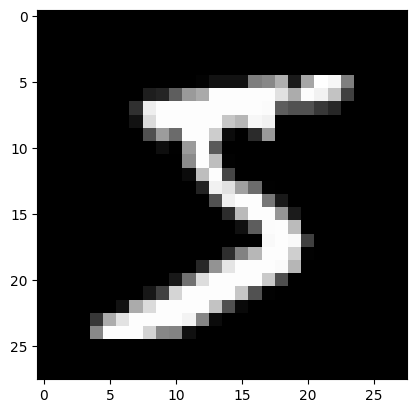

Image Label: 0


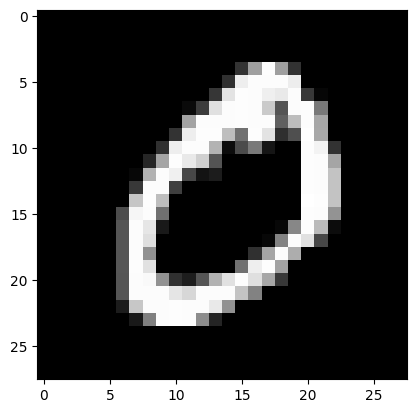

Image Label: 4


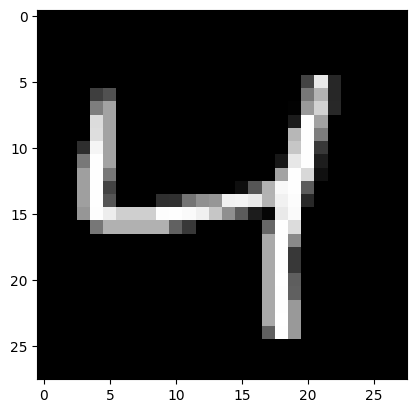

Image Label: 1


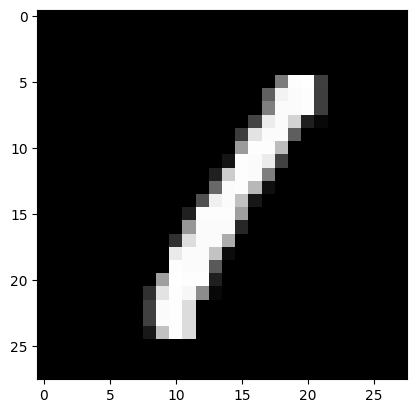

Image Label: 9


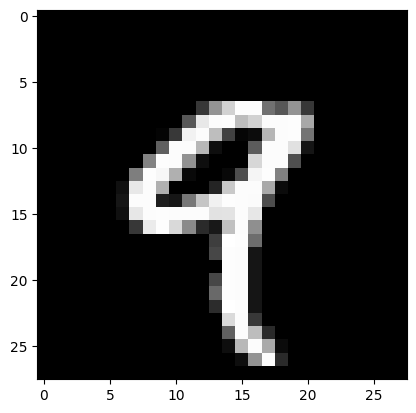

Image Label: 2


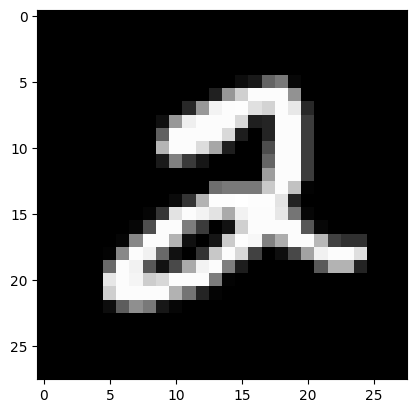

In [21]:
### Iterate Once ###
for image, label in train:
    print(image.shape)
    print(label)
    break
    
### Iterate and Display Images ###
counter = 0
for image, label in train:
    if counter == 6:
        break
    image = image.squeeze().numpy()
    print("Image Label:", label)
    plt.imshow(image, cmap="gray")
    plt.show()
    counter += 1

# Neural Network Considerations
When building a Neural Network there are a few things we have to consider:
- **Batch Size:** How many samples do we want to feed through the network at every step?
  - Too large a batch size and we wont be able to fit our data in Memory
  - Too small a batch size, our model wont see a wide enough range of data every time to generalize properly

- **Optimizer:** How will be descend our Cost Curve? The most common optimizer is **Adam** but different problems can benifit from a different optimizer

- **Loss Function:** How do we calculate error? This is highly dependent on the problem! Is it a regression or classification, how many classes do we have, etc...

- **EPOCHS:** How many passes do we want through the entire data? Too few passes and the model will not have learned the weights (Underfitting), too many and the model will have memorized the data (Overfitting)

- **LR:** How quickly do we want to learn? Too fast will be unstable, but too slow will cause training to take more time than necessary 


## Overfitting/Underfitting
![image](https://1.cms.s81c.com/sites/default/files/2021-03-03/model-over-fitting.png)
credit: https://www.ibm.com/cloud/learn/overfitting

## Activation Functions
![image](https://miro.medium.com/max/1400/1*ZafDv3VUm60Eh10OeJu1vw.png)
credit: https://medium.com/@shrutijadon/survey-on-activation-functions-for-deep-learning-9689331ba092

Lets define some of these below as our starting point

In [22]:
BATCH_SIZE = 128
LOSS = nn.CrossEntropyLoss() # We use CrossEntropy for multi-class classification problems
LR = 0.008
EPOCHS = 5

### Batch and MiniBatch Gradient Descent

When we trained our Linear and Logistic Regression examples, we created two tensors, X and y, that contained all the data we have. We then passed the entire tensor into the model for gradient updates. This is known more specifically as **Batch Gradient Descent**, where the entire dataset is used in every iteration to optimize our model. Unfortunately, as our data becomes larger and more complex, we cannot pass the entire dataset into the model at once. Mnist for example would a tensor of size [6000 x 1 x 28 x 28], idicating we have 60000 images, each image has only one channel (grayscale) and the channels are 28 by 28 pixels in size. Therefore we have to use something known as **MiniBatch Gradient Descent** where we randomly sample smaller subsets from the data for training, and then iterate through the dataset. Here is an example of how the optimization differs between the two:

![image](https://www.andreaperlato.com/img/minibatchgraddesc.png)

credit:https://www.andreaperlato.com/img/minibatchgraddesc.png

As we can clearly see, Batch Gradient Descent offers a much smoother training curve, but to allow for feasible computation we will have to depend on MiniBatch Gradient descent. Luckily, PyTorch allows for us to do MiniBatches via their **DataLoader**. We will go into more detail on this later, but for now lets just see roughly how it works. 


As we saw previously, when we iterated through the PyTorch MNIST Train dataset, each iteration will return a single sample at a time, but we now want to return a random sample of 128 at a time (Batch Size). To do this, we just have to wrap our train and test datasets we made before with the DataLoader class that we imported from PyTorch. Once we do this, we see that our dataloader now returns images in the shape [128 x 1 x 28 x 28] at a time rather than the [1 x 1 x 28 x 28].

**Note:**: Shapes for images typically go [Batch Size x Number of Channels x Image Height x Image Width]

In [24]:
### Build DataLoaders ###
trainset = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testset = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

for images, labels in trainset:
    print(images.shape)
    print(labels)
    break

torch.Size([128, 1, 28, 28])
tensor([9, 1, 4, 1, 1, 1, 2, 0, 0, 9, 0, 1, 6, 9, 0, 3, 3, 8, 9, 7, 9, 0, 2, 9,
        2, 3, 4, 7, 0, 5, 5, 7, 0, 4, 8, 4, 4, 2, 2, 5, 6, 1, 7, 5, 8, 7, 8, 0,
        7, 2, 6, 9, 7, 5, 9, 0, 9, 8, 7, 6, 6, 7, 9, 6, 4, 4, 9, 1, 5, 7, 1, 0,
        0, 0, 0, 4, 0, 3, 9, 1, 9, 4, 3, 0, 7, 9, 3, 4, 5, 9, 4, 9, 3, 8, 8, 7,
        3, 9, 0, 1, 7, 0, 9, 3, 3, 2, 3, 9, 8, 9, 0, 7, 1, 7, 3, 8, 2, 9, 8, 1,
        8, 7, 1, 7, 2, 3, 9, 2])


## Build Simple Dense Network
A dense network only uses fully connected layers (we will look at a more complex architecure next)

![image](https://miro.medium.com/max/1400/1*VHOUViL8dHGfvxCsswPv-Q.png)


credit: https://medium.com/swlh/fully-connected-vs-convolutional-neural-networks-813ca7bc6ee5

Components of a PyTorch Neural Network Architecutre
- ``__init__()``: This is where we declare the exact specifications of every layer we want in our Neural Network
- ``forward()``: This is where we explicitly state the path our input data will take through our declared layers in the init


### From Logits to Probability: Softmax!
For each class in our output, we don't care about the raw outputs, we want probabilities. Therefore we need to scale the raw values that output to a list of probabilities for each class that all sum up to 1. Notice that in Binary Classification we used Sigmoid and in MultiClass classification we use Softmax. **BUT!!!** The Cross Entropy Loss **EXPECTS LOGITS**. It will apply the softmax within the loss function itself for numerical stability reasons.

$$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$


In [ ]:
class FCNet(nn.Module): # Inherit in nn.Module Class
    def __init__(self):
        super().__init__() # initialize the nn.Module Class
        self.fc1 = nn.Linear(28*28, 64) # input flattened 28*28 into 64 node layer
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # Output to 10 neurons as we have 10 options
        
    def forward(self, x):
        """
        Activation Function: ReLU
        """
        x = x.view(-1, 28*28) # reshape to flaten our batch*28*28 to be batch*784
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
#     x = F.log_softmax(self.fc4(x), dim=1) This is wrong, our loss expectects logits not probabilities
        x = self.fc4(x)
        return x

## Training Loop 
Unlike some other Deep Learning Frameworks, in PyTorch we have to write our own code for the training loop. Although this is more work, we can customize quite a bit how we want to train our model

In [ ]:
# Declare Model
model = FCNet()
# Declare Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS+1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        optimizer.zero_grad() # We want to zero the gradient before every forward pass
        forward_out = model(X)
        loss_val = LOSS(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward() # Calculate Gradients
        optimizer.step() # Take a step towards optimizing

    print(f"Loss: {np.mean(losses)}")

print("Time On CPU for Model Training: {}".format(time.time() - start))

Epoch 1
Loss: 0.29256682720249777
Epoch 2
Loss: 0.14145480008966632
Epoch 3
Loss: 0.11255062570068627
Epoch 4
Loss: 0.09958801051772544
Epoch 5
Loss: 0.08457527436447074
Time On CPU for Model Training: 19.269397497177124


In [25]:
correct = 0
total = 0

model.eval()

with torch.no_grad(): # Do not update weights with test data
    for data in testset:
        X, y = data
        forward_out = model(X)
        
        for idx, i in enumerate(forward_out):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.96


## Recap

And just like that we have 95% Accuracy! This means that given an image of a number, we can detect the number more than 95% percent of the time. 

Do keep in mind though, accuracy is not the only metric we should look at, and how you define a good model can be problem dependent

## GPU Acceleration
This was a great example to get you started but we have a small issue, the training took about 60 seconds (this can change depending on where we ran it). This is also a relatively simple dataset with small images, and not too many samples. What if we have a massive dataset? How can we train our model in any meaningful way?

The process is identical, but lets move our training off of the CPU and onto a GPU (which are very good at doing linear algebra computations)

In PyTorch, a GPU is indicated by "cuda" and to move a model or tensor to the gpu all you have to do is ``.to("cuda")``

In this case we may not see a huge improvement because out dataset was not complex and our model is pretty simple as well, but this will become more important as we build larger models


## More Complex Acceleration
- DataParallel
- Distributed DataParallel

In [26]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Training Model on {DEVICE}")

!nvidia-smi

Training Model on cuda
Fri Apr 21 12:33:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN RTX    Off  | 00000000:01:00.0  On |                  N/A |
| 41%   49C    P8    40W / 280W |   1532MiB / 24212MiB |     21%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA TITAN RTX    Off  | 00000000:02:00.0 Off |         

In [27]:
# Declare Model (And Place on Device)
model = FCNet().to(DEVICE)
# Declare Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=LR)

start = time.time()
for epoch in range(1, EPOCHS+1):
    print("Epoch {}".format(epoch))
    losses = []
    for data in trainset:
        X, y = data
        X, y = X.to(DEVICE), y.to(DEVICE) # (Place the X and Y tensor on Device)
        optimizer.zero_grad() # We want to zero the gradient before every forward pass
        forward_out = model(X)
        loss_val = LOSS(forward_out, y)
        losses.append(loss_val.item())
        loss_val.backward() # Calculate Gradients
        optimizer.step() # Take a step towards optimizing
        
    print(f"Loss: {np.mean(losses)}")

### Due to the simplicty of the model we arent seeing huge gains here! This will quickly change later...
print("Time On GPU for Model Training: {}".format(time.time() - start))

Epoch 1
Loss: 0.3017341661682007
Epoch 2
Loss: 0.14161104268865035
Epoch 3
Loss: 0.11029404198039951
Epoch 4
Loss: 0.09453286825101385
Epoch 5
Loss: 0.08691235556642511
Time On GPU for Model Training: 18.483393669128418
